In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Convertir los datos en un DataFrame
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

C:\Users\diego\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicciones:
Predicción 1 para (Año: 2023): 1067070.32 USD
Predicción 2 para (Año: 2024): 1123880.36 USD
Intercepto (β0): -113859643.9056993
Coeficiente (Año, β1): 56810.04163345299


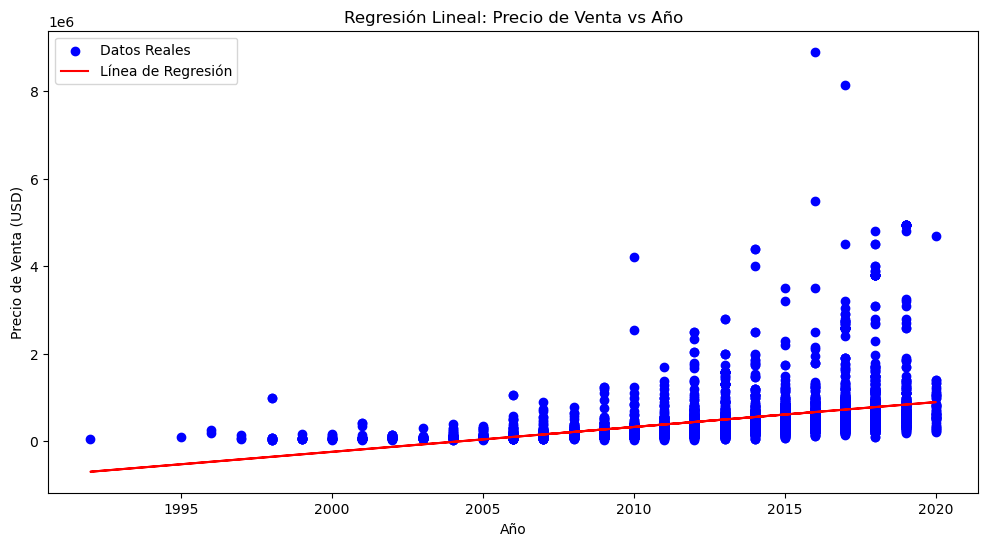

In [7]:
# Variables independientes (Año) y dependiente (Precio de venta)
X = df[['year']]
y = df['selling_price']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Predecir precios para dos nuevos valores (Años)
nuevo_X = np.array([[2023], [2024]])  # Nuevos años para predecir
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Año: {nuevo_X[i][0]}): {pred:.2f} USD")

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_[0]  # Pendiente (Año)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Año, β1): {beta_1}")

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Visualizar la regresión
plt.scatter(df['year'], y, color='blue', label='Datos Reales')
plt.plot(df['year'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio de Venta vs Año')
plt.xlabel('Año')
plt.ylabel('Precio de Venta (USD)')
plt.legend()
plt.show()


In [8]:
# Mostrar las primeras filas para ver cómo están estructurados los datos
print(df.head())

# Verificar información general del DataFrame
print(df.info())

# Estadísticas descriptivas para entender mejor la distribución de cada columna
print(df.describe())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   i

In [9]:
# Revisar valores únicos en cada columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

# Comprobar si hay valores nulos
print(df.isnull().sum())

name: 1491 valores únicos
year: 27 valores únicos
selling_price: 445 valores únicos
km_driven: 770 valores únicos
fuel: 5 valores únicos
seller_type: 3 valores únicos
transmission: 2 valores únicos
owner: 5 valores únicos
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


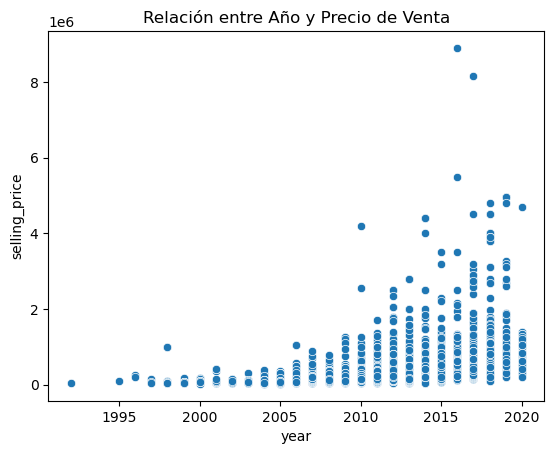

In [10]:
# Usar scatterplot para ver la relación entre año y precio de venta
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Relación entre Año y Precio de Venta')
plt.show()

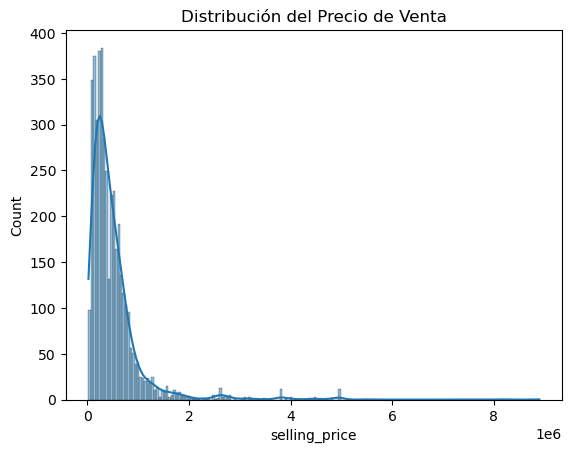

In [11]:
# Histograma del precio de venta
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribución del Precio de Venta')
plt.show()

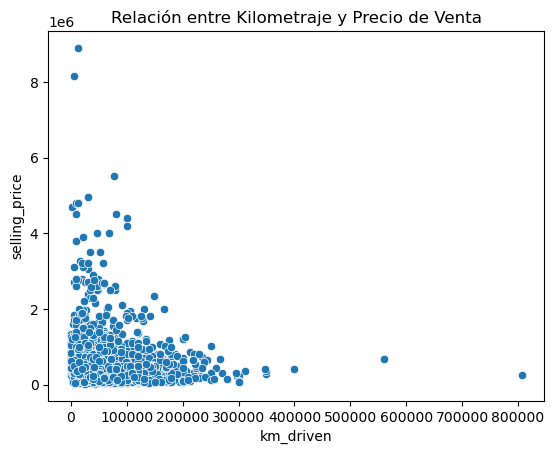

In [12]:
# Relación entre kilometraje y precio de venta
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title('Relación entre Kilometraje y Precio de Venta')
plt.show()

In [13]:
# Detección de valores atípicos usando el IQR para la columna 'selling_price'
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores atípicos
df = df[(df['selling_price'] >= (Q1 - 1.5 * IQR)) & (df['selling_price'] <= (Q3 + 1.5 * IQR))]

# Hacer lo mismo para la columna 'km_driven' si es necesario
Q1_km = df['km_driven'].quantile(0.25)
Q3_km = df['km_driven'].quantile(0.75)
IQR_km = Q3_km - Q1_km

df = df[(df['km_driven'] >= (Q1_km - 1.5 * IQR_km)) & (df['km_driven'] <= (Q3_km + 1.5 * IQR_km))]

# Verificar la nueva cantidad de datos después de eliminar valores atípicos
print(df.shape)

(3962, 8)


C:\Users\diego\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicciones:
Predicción 1 para (Año: 2023): 765481.85 USD
Predicción 2 para (Año: 2024): 802524.60 USD
Intercepto (β0): -74171991.24859816
Coeficiente (Año, β1): 37042.74498235693


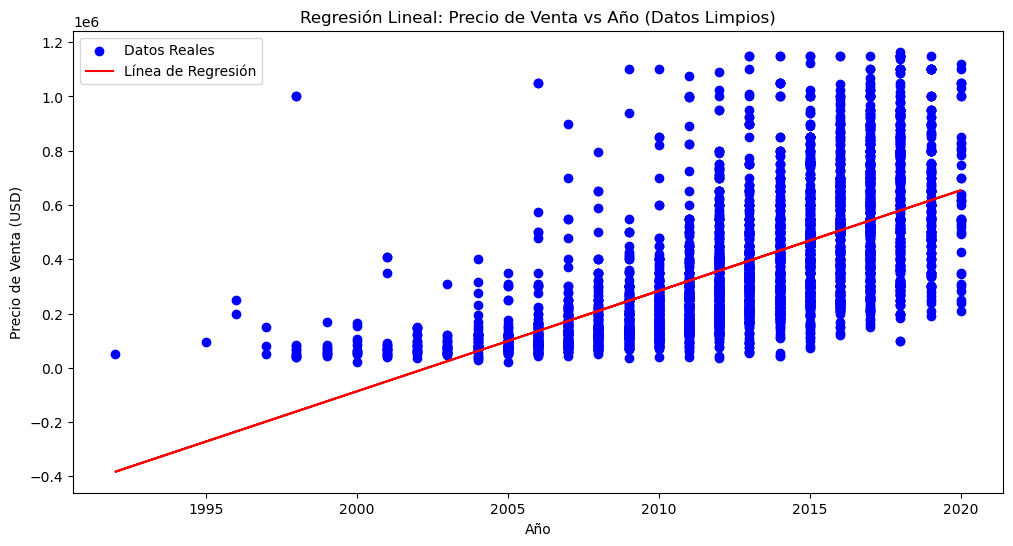

In [14]:
# Crear un modelo de regresión lineal con el dataset limpio
X = df[['year']]
y = df['selling_price']

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Predecir precios para dos nuevos valores (Años)
nuevo_X = np.array([[2023], [2024]])  # Nuevos años para predecir
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Año: {nuevo_X[i][0]}): {pred:.2f} USD")

# Ver coeficientes de nuevo
print(f"Intercepto (β0): {modelo.intercept_}")
print(f"Coeficiente (Año, β1): {modelo.coef_[0]}")

# Visualizar la regresión actualizada
plt.figure(figsize=(12, 6))
plt.scatter(df['year'], y, color='blue', label='Datos Reales')
plt.plot(df['year'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio de Venta vs Año (Datos Limpios)')
plt.xlabel('Año')
plt.ylabel('Precio de Venta (USD)')
plt.legend()
plt.show()

In [15]:
# Verificar información general del DataFrame
print(df.info())

# Estadísticas descriptivas para entender mejor la distribución de cada columna
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3962 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3962 non-null   object
 1   year           3962 non-null   int64 
 2   selling_price  3962 non-null   int64 
 3   km_driven      3962 non-null   int64 
 4   fuel           3962 non-null   object
 5   seller_type    3962 non-null   object
 6   transmission   3962 non-null   object
 7   owner          3962 non-null   object
dtypes: int64(3), object(5)
memory usage: 278.6+ KB
None
              year  selling_price      km_driven
count  3962.000000   3.962000e+03    3962.000000
mean   2012.952802   3.933060e+05   63031.126451
std       4.227743   2.485049e+05   36224.197516
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.000000e+05   35000.000000
50%    2014.000000   3.450000e+05   60000.000000
75%    2016.000000   5.500000e+05   90000.000000
max    2020.000000  

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

In [17]:
# Predecir valores en los datos originales
predicciones = modelo.predict(X)

# Calcular MAE
mae = mean_absolute_error(y, predicciones)
print(f"Error Absoluto Medio (MAE): {mae:.2f} USD")

# Calcular R^2
r2 = r2_score(y, predicciones)
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

Error Absoluto Medio (MAE): 147604.57 USD
Coeficiente de Determinación (R^2): 0.40


In [18]:
# Comprobar valores faltantes
print(df.isnull().sum())

# Opción 1: Eliminar filas con valores faltantes
df = df.dropna()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [19]:
# Codificación de variables categóricas
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [20]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo columnas numéricas
numerical_features = ['year', 'km_driven']
scaler = StandardScaler()

# Aplicar el escalado
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [21]:
# Variables independientes (ahora incluye columnas transformadas) y dependiente
X = df.drop('selling_price', axis=1)  # Todas las columnas excepto el precio de venta
y = df['selling_price']  # Variable objetivo

In [22]:
# Verificar información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3962 entries, 0 to 4339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          3962 non-null   object 
 1   year                          3962 non-null   float64
 2   selling_price                 3962 non-null   int64  
 3   km_driven                     3962 non-null   float64
 4   fuel_Diesel                   3962 non-null   bool   
 5   fuel_Electric                 3962 non-null   bool   
 6   fuel_LPG                      3962 non-null   bool   
 7   fuel_Petrol                   3962 non-null   bool   
 8   seller_type_Individual        3962 non-null   bool   
 9   seller_type_Trustmark Dealer  3962 non-null   bool   
 10  transmission_Manual           3962 non-null   bool   
 11  owner_Fourth & Above Owner    3962 non-null   bool   
 12  owner_Second Owner            3962 non-null   bool   
 13  owner_Te

In [ ]:
# Eliminar la columna 'name' del DataFrame
df = df.drop(columns=['name'])

In [26]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Filtrar la correlación de las características con la variable 'selling_price'
correlation_with_target = correlation_matrix['selling_price'].sort_values(ascending=False)
print(correlation_with_target)

selling_price                   1.000000
year                            0.630198
fuel_Diesel                     0.340564
seller_type_Trustmark Dealer    0.177376
owner_Test Drive Car            0.114724
fuel_Electric                  -0.005327
fuel_LPG                       -0.069342
owner_Fourth & Above Owner     -0.126564
owner_Third Owner              -0.184141
owner_Second Owner             -0.207900
transmission_Manual            -0.210139
seller_type_Individual         -0.225288
km_driven                      -0.285932
fuel_Petrol                    -0.319660
Name: selling_price, dtype: float64


In [27]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar las 5 características más importantes
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

# Ver las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['year', 'km_driven', 'fuel_Diesel', 'fuel_Petrol',
       'seller_type_Individual'],
      dtype='object')


In [28]:
from sklearn.linear_model import Lasso
import numpy as np

# Ajustar el modelo Lasso y seleccionar características
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Identificar características con coeficientes distintos de cero
selected_features = X.columns[np.abs(lasso.coef_) > 0]
print("Características seleccionadas con Lasso:", selected_features)

Características seleccionadas con Lasso: Index(['year', 'km_driven', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar un modelo de Random Forest
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)

# Obtener importancia de características
importances = forest.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Importancia de características:\n", feature_importances)

Importancia de características:
 year                            0.530814
km_driven                       0.233931
fuel_Diesel                     0.104384
transmission_Manual             0.045597
owner_Second Owner              0.026372
seller_type_Individual          0.022687
seller_type_Trustmark Dealer    0.017490
owner_Third Owner               0.009599
owner_Test Drive Car            0.004480
owner_Fourth & Above Owner      0.003055
fuel_Petrol                     0.001426
fuel_LPG                        0.000155
fuel_Electric                   0.000009
dtype: float64


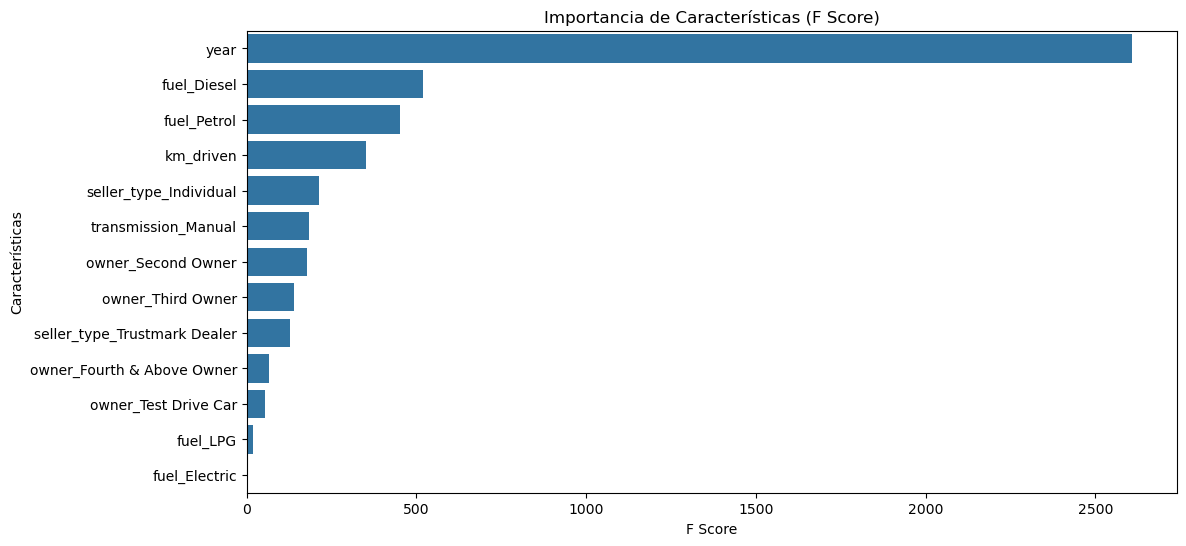

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression

# Calcular los puntajes F y los valores p para todas las características
f_scores, p_values = f_regression(X, y)

# Crear un DataFrame para visualizar
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'F Score': f_scores
})

# Ordenar por puntaje F
feature_importance = feature_importance.sort_values(by='F Score', ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x='F Score', y='Feature', data=feature_importance)
plt.title('Importancia de Características (F Score)')
plt.xlabel('F Score')
plt.ylabel('Características')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test (80% para entrenamiento y 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 3169 muestras
Tamaño del conjunto de prueba: 793 muestras


In [35]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de regresión lineal
modelo = LinearRegression(fit_intercept=True)  # fit_intercept puede ser True o False

# Entrenar el modelo con el conjunto de entrenamiento
modelo.fit(X_train, y_train)
    
# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:")
for feature, coef in zip(X.columns[selector.get_support()], modelo.coef_):
    print(f"{feature}: {coef:.2f}")

# Intercepto
print(f"Intercepto: {modelo.intercept_:.2f}")

Coeficientes del modelo:
year: 131081.14
km_driven: -31876.65
fuel_Diesel: 199437.85
fuel_Petrol: 38326.16
seller_type_Individual: -59647.06
Intercepto: 325712.91


In [36]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda
param_grid = {
    'fit_intercept': [True, False]
}

# Instanciar el modelo
modelo = LinearRegression()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor hiperparámetro
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'fit_intercept': True}


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Realizar predicciones en el conjunto de prueba
predicciones_test = modelo.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, predicciones_test)
rmse = mean_squared_error(y_test, predicciones_test, squared=False)  # squared=False para obtener RMSE
r2 = r2_score(y_test, predicciones_test)

# Mostrar los resultados
print(f"Error Absoluto Medio (MAE): {mae:.2f} USD")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f} USD")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

Error Absoluto Medio (MAE): 130554.16 USD
Raíz del Error Cuadrático Medio (RMSE): 177126.83 USD
Coeficiente de Determinación (R^2): 0.50


C:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


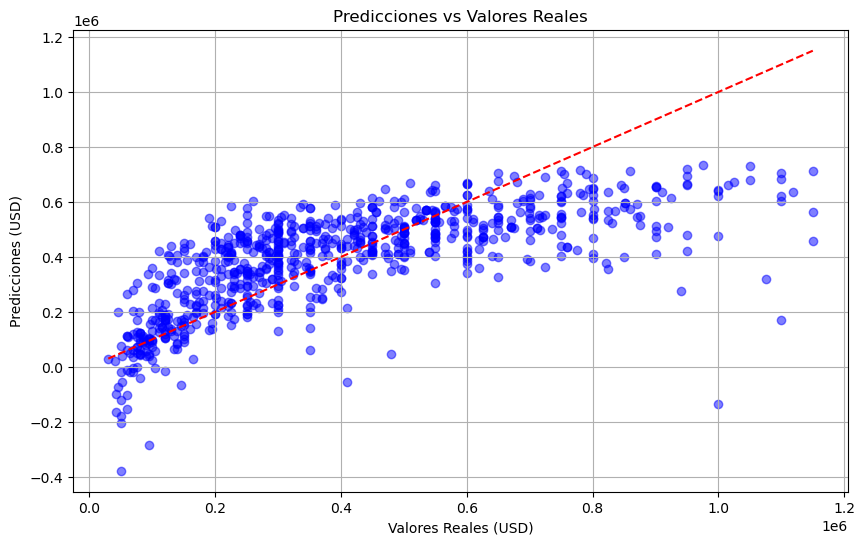

In [41]:
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
predicciones_test = modelo.predict(X_test)

# Gráfica de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales (USD)')
plt.ylabel('Predicciones (USD)')
plt.grid()
plt.show()

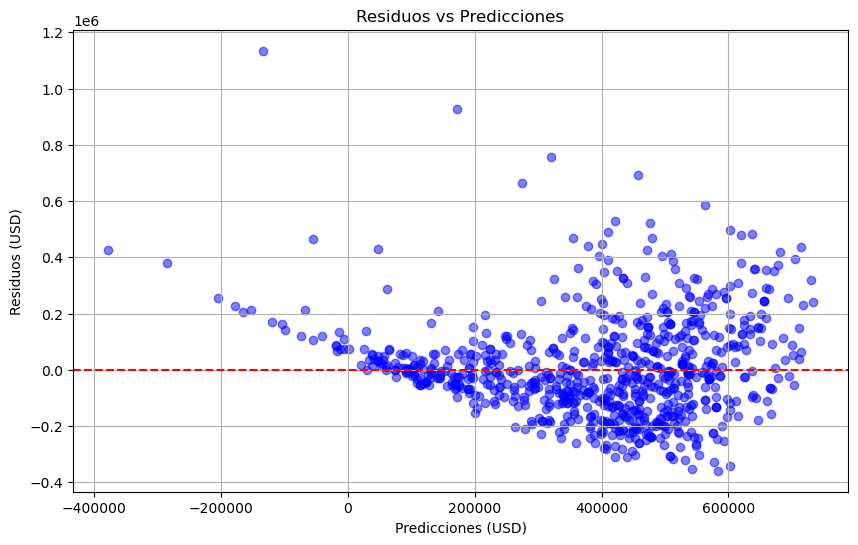

In [42]:
# Calcular los residuos
residuos = y_test - predicciones_test

# Gráfica de Residuos
plt.figure(figsize=(10, 6))
plt.scatter(predicciones_test, residuos, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')  # Línea en y=0
plt.title('Residuos vs Predicciones')
plt.xlabel('Predicciones (USD)')
plt.ylabel('Residuos (USD)')
plt.grid()
plt.show()

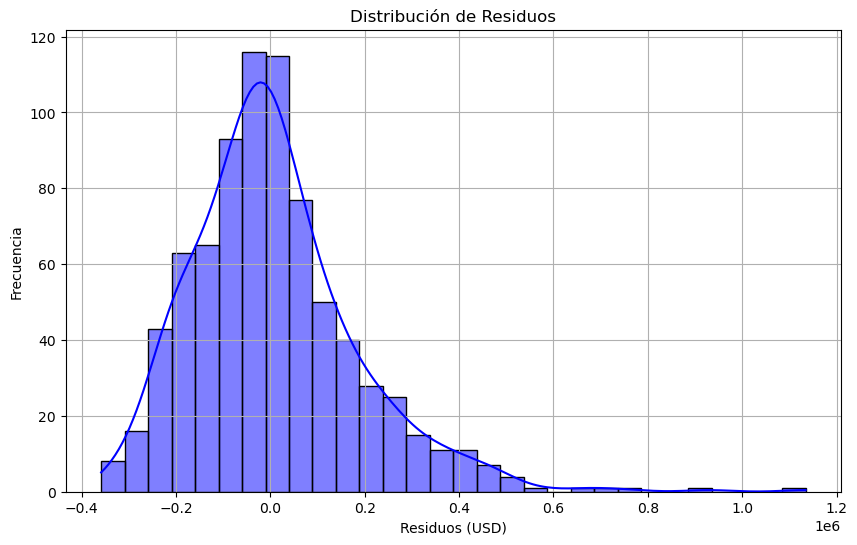

In [44]:
import seaborn as sns

# Gráfica de distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, bins=30, kde=True, color='blue')
plt.title('Distribución de Residuos')
plt.xlabel('Residuos (USD)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()